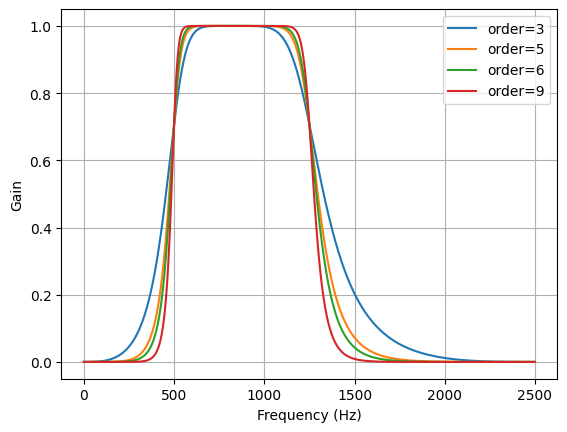

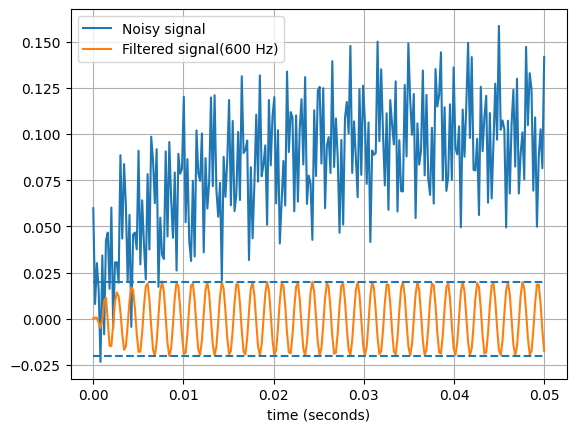

In [18]:
from scipy.signal import butter, lfilter, freqz
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style


def butter_bandpass(lowcut, highcut, fs, order =5):
    # if fs is not provided then we have to normalized freqs with nyq by ourself
    # nyq = 0.5*fs
    # low = lowcut/nyq
    # high = highcut/nyq
    low = lowcut
    high = highcut


    #how much b and a determs poles and zeros.
    #single pole filter would have only a0 and b1
    b,a = butter(order,[low,high],btype='band', fs=fs)
    return b,a

def butter_bandpass_filter(data, lowcut,highcut, fs ,order=5):
    b, a = butter_bandpass(lowcut,highcut,fs, order=order)
    y = lfilter(b,a,data)
    return y

fs = 5000
lowcut =500
highcut =1250

plt.figure(1)

for order in [3,5,6,9]:
    b,a = butter_bandpass(lowcut,highcut,fs, order =order)
    #Without fs: The frequencies are returned as normalized frequencies (radians/sample) between 0 and  𝜋
    #With fs:   The frequencies are returned in Hertz.
    w,h = freqz(b,a,worN=2000,fs=fs)

    # in no fs param:
    # plt.plot(w, abs(h),label ='order=%d'%order )
    plt.plot(w, abs(h),label ='order=%d'%order )

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.legend(loc='best')

#Test Filter

T =0.05
nsamples = T*fs
#generate 250 samples from 0 to 0.05
t = np.linspace(0,T, int(nsamples))
a = 0.02
f0 = 600

x1 = 0.1*np.sin(2*np.pi*1.2*np.sqrt(t))
x2 = 0.01*np.cos(2*np.pi*312*t+0.1)
x3 = a*np.cos(2*np.pi*f0*t+.11)
x4 = 0.03*np.cos(2*np.pi*2000*t)

x = x1+x2+x3+x4

plt.figure(2)
plt.plot(t,x, label='Noisy signal')

y = butter_bandpass_filter(x,lowcut,highcut,fs,order=6)
plt.plot(t,y,label ='Filtered signal(%g Hz)'% f0)
plt.xlabel('time (seconds)')
plt.hlines([-a,a],0,T,linestyles='--')
plt.grid()
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()







In [ ]:
#